# Likelihood evaluations for Palanque-Delabrouille et al. (2013)

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
# temporal
import camb
# our own modules
import simplest_emulator
import linear_emulator
import data_PD2013
import mean_flux_model
import thermal_model
import camb_cosmo
import fit_linP
import recons_cosmo
import compute_likelihood

### Specify suite of simulations to use, read P1D arxiv and setup simplest emulator

In [2]:
basedir='/Users/font/CosmoData/test_sim_emulator/test_medium/'
#basedir='../mini_sim_suite/'
p1d_label='mf_p1d'
skewers_label='Ns100_wM0.05'
#emu=simplest_emulator.SimplestEmulator(basedir,p1d_label,skewers_label,max_arxiv_size=300,verbose=True)
emu=linear_emulator.LinearEmulator(basedir,p1d_label,skewers_label,max_arxiv_size=200,verbose=True)

latin hyper-cube data {'param_space': {'Om_star': {'ip': 0, 'min_val': 0.955, 'max_val': 0.975, 'z_star': 3.0, 'latex': '$\\Omega_\\star$'}, 'Delta2_star': {'ip': 1, 'min_val': 0.25, 'max_val': 0.45, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\Delta^2_\\star$'}, 'n_star': {'ip': 2, 'min_val': -2.35, 'max_val': -2.25, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$n_\\star$'}, 'alpha_star': {'ip': 3, 'min_val': -0.265, 'max_val': -0.165, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\alpha_\\star$'}, 'mu_He': {'ip': 4, 'min_val': 0.5, 'max_val': 2.0, 'latex': '$\\mu_{\\rm He}$'}, 'mu_H': {'ip': 5, 'min_val': 0.5, 'max_val': 2.0, '   latex': '$\\mu_{\\rm H}$'}}, 'nsamples': 10, 'samples': {'0': [0.96, 0.32, -2.325, -0.22, 0.875, 1.7750000000000001], '1': [0.966, 0.4, -2.295, -0.23, 1.175, 0.575], '2': [0.968, 0.36, -2.285, -0.26, 1.7750000000000001, 1.625], '3': [0.97, 0.3, -2.315, -0.18, 1.3250000000000002, 1.3250000000000002], '4': [0.974, 0.34, -2.305, -0.21000000000000002, 1.475, 1.175], '5': [

In [3]:
# let's keep verbosity low
emu.verbose=False
emu.arxiv.verbose=False

### Read P1D data from Palanque-Delabrouille et al. (2013)

In [4]:
basedir='../../p1d_data/data_files/PD2013/'
data=data_PD2013.P1D_PD2013(basedir=basedir,blind_data=False)
zs=data.z
Nz=len(zs)

### Setup nuisance models

In [5]:
mf_model=mean_flux_model.MeanFluxModel()
T_model=thermal_model.ThermalModel()

In [6]:
z=3.4
print('<F>(z=%.2f) = %f'%(z,mf_model.get_mean_flux(z)))
print('T_0(z=%.2f) = %f'%(z,T_model.get_T0(z)))
print('gamma(z=%.2f) = %f'%(z,T_model.get_gamma(z)))

<F>(z=3.40) = 0.542428
T_0(z=3.40) = 10000.000000
gamma(z=3.40) = 1.456532


### Setup cosmological model

In [7]:
# specify cosmology
cosmo = camb_cosmo.get_cosmology(mnu=0.15, ns=0.965, omch2=0.12)
# print relevant information about the cosmology object
camb_cosmo.print_info(cosmo)

H0 = 6.7000E+01, Omega_b h^2 = 2.2000E-02, Omega_c h^2 = 1.2000E-01, Omega_k = 0.0000E+00, Omega_nu h^2 = 1.6128E-03, T_CMB = 2.7255E+00, A_s = 2.1000E-09, n_s = 9.6500E-01, alpha_s = 0.0000E+00


In [8]:
# compute linear power parameters, around z_star and kp_kms
z_star=3.0
kp_kms=0.009
linP_model=fit_linP.LinearPowerModel(cosmo,z_star=z_star,k_units='kms',kp=kp_kms)
linP_model.get_params()

{'Delta2_star': 0.34359089153174016,
 'alpha_star': -0.21586983258446132,
 'f_star': 0.97514327990258953,
 'g_star': 0.968209492732573,
 'n_star': -2.300572652881717}

### Use fiducial cosmology to reconstruct input cosmology

In [9]:
# setup fiducial cosmology
cosmo_fid = camb_cosmo.get_cosmology()
# reconstruct cosmology using linear parameter model (at z_star, kp_kms)
rec_cosmo=recons_cosmo.ReconstructedCosmology(linP_model,cosmo_fid)
# compute linear power parameters at each redshift (in Mpc)
linP_Mpc_params=rec_cosmo.get_linP_Mpc_params(zs)

Note: redshifts have been re-sorted (earliest first)


### For each redshift, plot data vs model

2.2 model {'Delta2_p': 0.52940508668690001, 'n_p': -2.3007135087498813, 'alpha_p': -0.21576273788697528, 'f_p': 0.95899824656437238, 'mF': 0.80075859414516326, 'gamma': 1.5523173420452847, 'sigT_Mpc': 0.13071399425598651}
2.8 model {'Delta2_p': 0.42463796726199332, 'n_p': -2.3007135087498813, 'alpha_p': -0.2157627378869619, 'f_p': 0.97227822727415136, 'mF': 0.68128831772300569, 'gamma': 1.4998705770834098, 'sigT_Mpc': 0.12145041127572205}
3.4 model {'Delta2_p': 0.34761780307480111, 'n_p': -2.3007135087498805, 'alpha_p': -0.21576273788696995, 'f_p': 0.97944520219171294, 'mF': 0.54242806197447857, 'gamma': 1.4565317960122977, 'sigT_Mpc': 0.11361265770091636}
4.0 model {'Delta2_p': 0.29021917083794507, 'n_p': -2.3007135087498805, 'alpha_p': -0.21576273788697711, 'f_p': 0.98359699813521018, 'mF': 0.39911365088156847, 'gamma': 1.4197651254234163, 'sigT_Mpc': 0.106979709622334}


(0.005, 0.6)

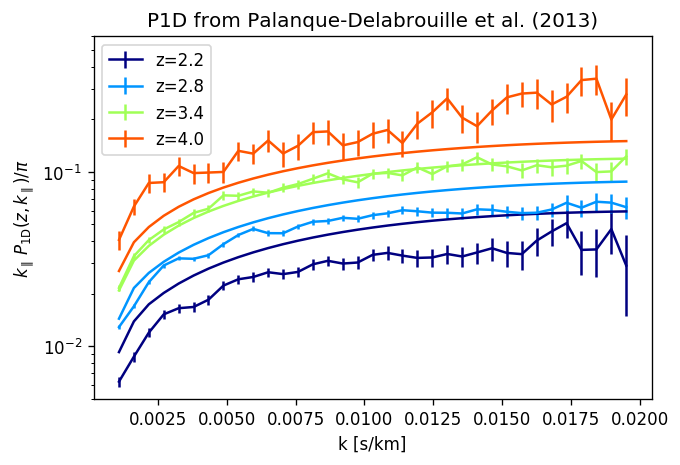

In [10]:
# plot only few redshifts for clarity
for iz in range(0,Nz,3):
    # acess data for this redshift
    z=zs[iz]
    k_kms=data.k
    p1d=data.get_Pk_iz(iz)
    cov=data.get_cov_iz(iz)
    # get emulator parameters for linear power, at this redshift (in Mpc)
    model=linP_Mpc_params[iz]
    # get emulator parameters for nuisance models, at this redshift
    model['mF']=mf_model.get_mean_flux(z)
    model['gamma']=T_model.get_gamma(z)
    T0=T_model.get_T0(z)
    sigT_kms=thermal_model.thermal_broadening_kms(T0)
    dkms_dMpc=rec_cosmo.reconstruct_Hubble(z)/(1+z)
    model['sigT_Mpc']=sigT_kms/dkms_dMpc
    print(z,'model',model)
    # emulate p1d
    k_Mpc = k_kms * dkms_dMpc
    p1d_Mpc = emu.emulate_p1d_Mpc(model,k_Mpc)
    emu_p1d_kms = p1d_Mpc * dkms_dMpc
    # plot everything
    col = plt.cm.jet(iz/(Nz-1))
    plt.errorbar(k_kms,p1d*k_kms/np.pi,color=col,yerr=np.sqrt(np.diag(cov))*k_kms/np.pi,label='z=%.1f'%z)
    plt.plot(k_kms,emu_p1d_kms*k_kms/np.pi,color=col)
plt.yscale('log')
plt.legend()
plt.title('P1D from Palanque-Delabrouille et al. (2013)')
plt.xlabel('k [s/km]')
plt.ylabel(r'$k_\parallel \, P_{\rm 1D}(z,k_\parallel) / \pi$')
plt.ylim(0.005,0.6)

In [11]:
chi2 = compute_likelihood.get_chi2(data,cosmo_fid,emu,rec_cosmo,mf_model,T_model,linP_Mpc_params,verbose=False)

### Plot chi2 vs mean optical depth parameter

In [12]:
# effective optical depth at z=3
tau_0 = np.linspace(0.3,0.5,200)
Ntau=len(tau_0)

In [13]:
chi2_tau=np.empty(Ntau)
for i in range(Ntau):
    mf_model=mean_flux_model.MeanFluxModel(z_tau=3.0,ln_tau_coeff=[3.2, np.log(tau_0[i])])
    chi2_tau[i] =compute_likelihood.get_chi2(data,cosmo_fid,emu,rec_cosmo,mf_model,T_model,linP_Mpc_params)
    #print(i,tau_0[i],np.exp(-tau_0[i]),chi2_tau[i])

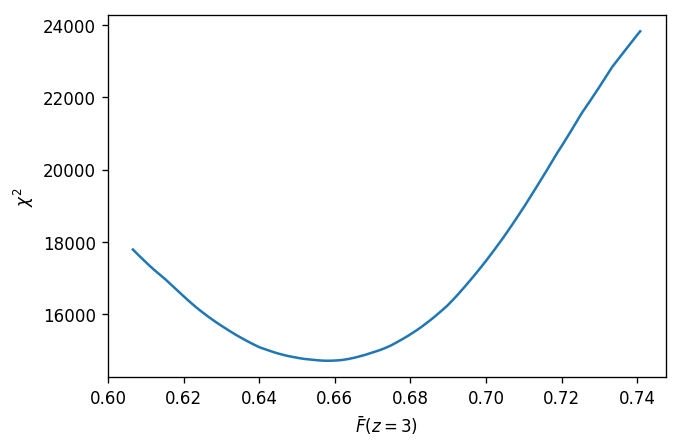

In [14]:
plt.plot(np.exp(-tau_0),chi2_tau)
plt.xlabel(r'$\bar F(z=3)$')
plt.ylabel(r'$\chi^2$')